<a href="https://colab.research.google.com/github/m677s345/EECS731_MS_Project1/blob/master/EECS731_project1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install cookiecutter and build code framework

In [1]:
!pip install cookiecutter
!cookiecutter https://github.com/drivendata/cookiecutter-data-science


     |████████████████████████████████| 51kB 2.7MB/s 
project_name [project_name]: EECS731_project1_pandas
repo_name [eecs731_project1_pandas]: EECS731_project1
author_name [Your name (or your organization/company/team)]: Matt Stalcup
description [A short description of the project.]: 
Select open_source_license:
1 - MIT
2 - BSD-3-Clause
3 - No license file
Choose from 1, 2, 3 [1]: 3
s3_bucket [[OPTIONAL] your-bucket-for-syncing-data (do not include 's3://')]: 
aws_profile [default]: 
Select python_interpreter:
1 - python3
2 - python
Choose from 1, 2 [1]: 1


Importing packages

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Tdf= pd.read_csv('/content/EECS731_project1/data/processed/110-tavg-all-7-2000-2020_cleaned.csv', header=[0], index_col=0)
Tdf.index=pd.to_datetime(Tdf.index)
LPdf= pd.read_csv('/content/EECS731_project1/data/processed/LivestockPrices_cleaned_Beef.csv',header=[0],index_col=0)
LPdf.index=pd.to_datetime(LPdf.index)
#Meatdf= pd.read_excel('/content/EECS731_project1_pandas/data/external/MeatStatsFull.xlsx',sheet_name='SlaughterWeights-Full', header=[0,1,2])
print(Tdf)

             Average Temperature
Date                            
2000-01-01                 33.57
2000-02-01                 39.78
2000-03-01                 46.04
2000-04-01                 52.59
2000-05-01                 63.14
...                          ...
2020-03-01                 46.08
2020-04-01                 50.86
2020-05-01                 60.89
2020-06-01                 70.29
2020-07-01                 75.67

[247 rows x 1 columns]


Statistics for medium grade steers from 500 to 800 pounds and prices are per 100 pounds.

In [153]:
MedStdf=LPdf.iloc[:,0:3]
MedStdf.describe()

,Steers: Med. #1 500-550 lb,Steers: Med. #1 600-650 lb,Steers: Med. #1 750-800 lb
count,247.000000,247.000000,247.000000
mean,147.648057,135.028097,124.863279
std,45.693877,40.217868,35.283329
min,87.500000,82.350000,76.320000
25%,111.625000,104.050000,98.050000
50%,133.090000,122.990000,114.990000
75%,169.930000,156.210000,144.590000
max,302.660000,262.340000,238.800000


Statistics for average temperature across the US

In [154]:
Tdf.describe()


,Average Temperature
count,247.000000
mean,53.466194
std,15.116254
min,28.440000
25%,39.505000
50%,53.240000
75%,68.260000
max,76.770000


Merging beef price datasets and Temperature data to form on dataset with a common Datetime 

In [178]:
df=pd.merge(Tdf,MedStdf, how = 'inner', right_index = True, left_index = True)

In [176]:
yearly_max=df.resample('Y').max()
print(yearly_max)

             Average Temperature  ...  Steers: Med. #1 750-800 lb
Date                              ...                            
2000-12-31                 74.05  ...                       90.53
2001-12-31                 74.48  ...                       91.64
2002-12-31                 75.85  ...                       85.22
2003-12-31                 75.47  ...                      104.46
2004-12-31                 72.90  ...                      117.10
2005-12-31                 75.31  ...                      117.42
2006-12-31                 76.41  ...                      117.58
2007-12-31                 74.70  ...                      117.04
2008-12-31                 74.08  ...                      112.78
2009-12-31                 72.63  ...                      102.16
2010-12-31                 74.71  ...                      118.04
2011-12-31                 76.14  ...                      144.02
2012-12-31                 76.77  ...                      155.58
2013-12-31

Graphical representration of the average temperature(monthly) and the price of medium 1 beef cattle 500 to 800 pounds(monthly)

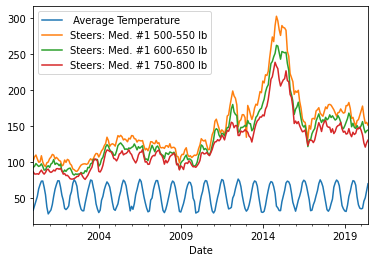

In [173]:
plt.close('all')
yearly_max.plot()
